# Calculation of intrinsic and total efficiencies for circular side of the detector

## Geometrical efficiency calculated from the previous part

[0.14210926224403175, 0.15432079739586313, 0.16841562759238127, 0.18469771878275149, 0.20342881712876315, 0.22469447264865566, 0.2481335351517391, 0.27248207183025464, 0.2950382968679147, 0.31159517017233423, 0.31776597060999934, 0.3115951701723343, 0.2950382968679148, 0.2724820718302547, 0.24813353515173925, 0.22469447264865577, 0.20342881712876323, 0.18469771878275154, 0.16841562759238135, 0.1543207973958632, 0.1421092622440318]
0.14210926224403175
0.15432079739586313
0.16841562759238127
0.18469771878275149
0.20342881712876315
0.22469447264865566
0.2481335351517391
0.27248207183025464
0.2950382968679147
0.31159517017233423
0.31776597060999934
0.3115951701723343
0.2950382968679148
0.2724820718302547
0.24813353515173925
0.22469447264865577
0.20342881712876323
0.18469771878275154
0.16841562759238135
0.1543207973958632
0.1421092622440318
0.14210926224403175
0.15432079739586313
0.16841562759238127
0.18469771878275149
0.20342881712876315
0.22469447264865566
0.2481335351517391
0.27248207183

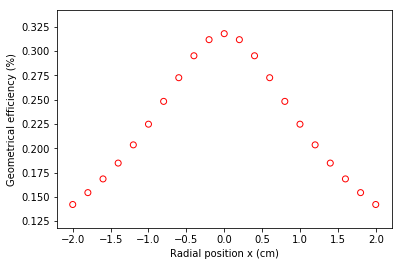

In [39]:
import math
import numpy
from matplotlib import pyplot as plt
import pandas as pd
R=2.54
t=0.05
y=1
z=0
x_positions=[]
geo_eff_cir=[]
for i in numpy.arange(-2, 2.2, 0.2): 
    x_positions.append(i)
    geo_eff=0.5*(1-math.cos(numpy.arctan((R+t)/y)))*(y/math.sqrt(i*i + y*y + z*z))
    geo_eff_cir.append(geo_eff) 
print(geo_eff_cir)



with open("cir_geo_twoin.csv", "w") as out_file:
     for number in geo_eff_cir:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_geo_twoin.csv",names=['Calculation'])
data.to_csv("cir_geo_twoinupdated.csv")


for number in geo_eff_cir:
    print(number)

plt.scatter(x_positions,geo_eff_cir, color="none", edgecolor="red", label="Experimental")
plt.xlabel('Radial position x (cm)')
plt.ylabel('Geometrical efficiency (%)')
plt.savefig("cirtwo_geo.pdf",bbox_inches='tight')
plt.show()

## Calculation of the survival probability of photon inside the cover layer (similar to the cylindrical side)

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


0.044350341777822225
0.04612720131854086
0.04818515433487836
0.05033882359659001
0.052435794705009815
0.054358958539593244
0.056022717811516964
0.05736709629848301
0.058351904084820466
0.05895191175623393
0.05915336600501904
0.058951911756233946
0.05835190408482047
0.05736709629848301
0.05602271781151695
0.054358958539593265
0.05243579470500983
0.05033882359659002
0.04818515433487839
0.04612720131854087
0.04435034177782223


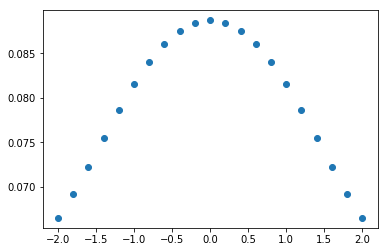

In [40]:
import math
import numpy
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 


mu=0.20979
R=2.54
t=0.05
h=5.1
z=1
i=0



integral1=[]
integral2=[]
integral_survive=[]
y_positions=[]
products=[]



for j in numpy.arange(-2, 2.2, 0.2):
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                
                    alpha=numpy.arcsin(abs(i)/R)
                 
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
              
                    
                    
   
             
#Definition of the limits of the intigration for the left side of the cylinder           
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                   
                    
#Definition of the limits of the intigration for the right side of the cylinder   
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R+t)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2)))]
                    def f1(r, theta, Phi):
                        return exp(-mu*r)*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                   
                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_survive=zip(integral1,integral2)
integral_survive = [sum(k) for k in sum_survive]
for number in integral_survive:
    print(number)
integral_survive=[x*1.5 for x in integral_survive]

plt.plot(y_positions,integral_survive, 'o')
plt.show()

## Calculation of interaction probability of the photon with crystal 

In [41]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=2.54
t=0.05
h=5.1
z=1
average=0
suma=0
i=0



integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]


for j in numpy.arange(-2, 2.2, 0.2):
        
                    y_positions.append(j) 
        
                    psi=numpy.arcsin(abs(i)/(R+t))
                 
                    alpha=numpy.arcsin(abs(i)/R)
                
                    t_prime=math.sqrt(R**2+(R+t)**2-2*R*(R+t)*math.cos(psi-alpha)) 
                
                    D_s= math.sqrt(i**2 +(z+t+R)**2)
                 
                    
                    
   
             
#Determination of the limits of the integral            
            
                    def bounds_Phi():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta(Phi):
                        return [0.0,numpy.arctan((abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area=integrate.nquad(f, [bounds_r, bounds_theta, bounds_Phi])
                    integral1.append(area[0])
                  
    
                    def bounds_Phi1():
                        return [0.0,numpy.arcsin(R/math.sqrt(i**2+(z+t+R)**2))]

                    def bounds_theta1(Phi):
                        return [0.0,numpy.arctan((-abs(j)+(h/2))/(t_prime +z))]

                    def bounds_r1(theta,Phi):
                        return [(1/(math.cos(theta)))*(D_s*(math.cos(Phi))-(math.sqrt((R)**2-(math.sin(Phi))**2*(R+t+z)**2))), (1/(math.cos(theta)))*(D_s*(math.cos(Phi))+(math.sqrt((R)**2-(math.sin(Phi))**2*(D_s)**2)))]
                    def f1(r, theta, Phi):
                        return (1-exp(-mu*r))*r**2*math.sin(theta)
                    area1=integrate.nquad(f, [bounds_r1, bounds_theta1, bounds_Phi1])
                    integral2.append(area1[0])
                     
                    
                   
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)

/home/shahin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead


379.31042372500127
351.53449611166553
326.66167316845224
304.7080629912544
285.6818014437824
269.5856359259051
256.41935370771296
246.18146895733804
238.870224420495
234.48412626827516
233.0222047069705
234.48412626827528
238.87022442049505
246.18146895733793
256.4193537077128
269.58563592590514
285.6818014437821
304.70806299125445
326.6616731684523
351.5344961116656
379.31042372500127


## Calculation of the intrinsic detection efficiency of the detecor for the circular side of that

-----------------------------
Thease are the products
25.233820398141564
24.32295370883192
23.6103647053672
23.00796814706309
22.469928437195325
21.98159160924923
21.54796364126814
21.184074054866425
20.907798636156397
20.73493128000746
20.67607164349185
20.734931280007476
20.907798636156404
21.184074054866414
21.54796364126812
21.981591609249243
22.469928437195307
23.007968147063092
23.610364705367218
24.322953708831932
25.233820398141564
THIS IS COEFFICIENT1
[0.482885, 0.5337810000000001, 0.602176, 0.629336, 0.658145, 0.692677, 0.7606, 0.8217, 0.8957, 0.9669]
These are the elements of products: 
12.18503336295659
12.983130553654012
14.2175949768192
14.479742641800096
14.788471051297917
15.226142931119927
16.389381145548548
17.40695365088374
18.727115238405286
20.04860505463921
20.67607164349185
20.04860505463923
18.727115238405293
17.406953650883732
16.389381145548533
15.226142931119938
14.788471051297904
14.4797426418001
14.21759497681921
12.98313055365402
12.18503336295659
This is 

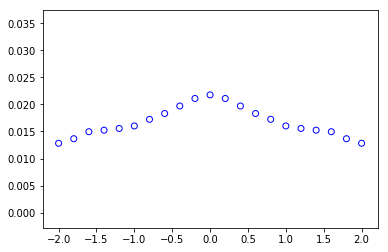

In [42]:
integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(integral_survive,integral_interact):
    total_num=(num1*num2)
    products.append(total_num)
print("-----------------------------")
print("Thease are the products")
for i in products:
    print(i)
    
    
products1=[]   


First_sublist=products[0:10]
Second_sublist=products[11:21]

Coefficient1=[0.5681*0.85, 0.59309*0.9, 0.6208*0.97, 0.6488*0.97, 0.6785*0.97, 0.7141*0.97, 0.7606, 0.8217, 0.8957, 0.9669]
Coefficient1 = [x * 1 for x in Coefficient1]
def Reverse(lst): 
    return [ele for ele in reversed(lst)] 

Coefficient2=Reverse(Coefficient1)


print("THIS IS COEFFICIENT1")
print(Coefficient1)


for num1, num2 in zip(First_sublist,Coefficient1):
    list_one=(num1*num2)
    products1.append(list_one)
    
    
products2=[i*1 for i in products[10:11]]
for number in products2:
     products1.append(number)
        

for num1, num2 in zip(Second_sublist,Coefficient2):
    list_two=(num1*num2) 
    products1.append(list_two)
    



    
print("These are the elements of products: ")
for i in products1:
    print(i)
print("This is the end of the elements of products")


for number in products1:
    average+=number/21
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/21)
er=Sigma/(math.sqrt(21)) 


intrinsic_eff=[]
for i in products1:
    intrinsic_eff.append(i/950)
    
with open("cir_intr_twoin.csv", "w") as out_file:
     for number in intrinsic_eff:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_intr_twoin.csv",names=['Calculation'])
data.to_csv("cir_intr_twoinupdated.csv")

    
plt.scatter(y_positions, intrinsic_eff, color="none", edgecolor="blue")
#plt.xlim(-1.9,1.9)
#plt.errorbar(x_positions, products1, yerr=er, capsize=3,ls='none')
#plt.ylim(0.022,0.043)
plt.savefig("cirtwo_intr.pdf", bbox_inches='tight')
plt.show()

## Calculation of the absolute detection efficiency of the detector for the circular side of the detector

0.0018227432648722885
0.0021090179576152435
0.002520489664079256
0.0028151320363176938
0.003166738076956307
0.003601294901453735
0.0042807948237833906
0.004992718731627386
0.005816017037040283
0.006575840530229711
0.006915949446522181
0.006575840530229717
0.0058160170370402855
0.004992718731627385
0.004280794823783389
0.0036012949014537395
0.0031667380769563056
0.002815132036317695
0.002520489664079259
0.0021090179576152457
0.0018227432648722894


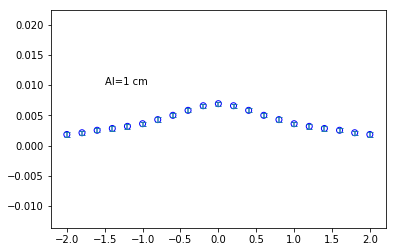

In [43]:
import math
import numpy
import pandas as pd
from scipy import exp, pi
from scipy import integrate
from matplotlib import pyplot as plt
from operator import add 

mu=0.29433
R=2.54
t=0.05
h=5.1
integral1=[]
integral2=[]
integral_interact=[]
x_positions=[]
y_positions=[]
products=[]
z=1
average=0
suma=0

for i in numpy.arange(-2, 2.2, 0.2):
    x_positions.append(i) 
    for j in numpy.arange(-2, 2.2, 0.2):
        y_positions.append(j) 
        

                    
integral1=numpy.asarray(integral1)
integral2=numpy.asarray(integral2)
sum_interact=zip(integral1,integral2)
integral_interact = [sum(k) for k in sum_interact]
for number in integral_interact:
    print(number)


integral_survive=numpy.asarray(integral_survive)
integral_interact=numpy.asarray(integral_interact)
for num1 , num2 in zip(geo_eff_cir,intrinsic_eff):
    total_num=(num1*num2)
    products.append(total_num)
for number in products:
    average+=number/21
for number in products:
    suma+=(number-average)*(number-average)
Sigma=math.sqrt(((suma))/21)
er=Sigma/(math.sqrt(21)) 

with open("cir_total_twoin.csv", "w") as out_file:
     for number in products:
        print(number)
        outstring=str(number)
        outstring+='\n'
        out_file.write(outstring)
        
data=pd.read_csv("cir_total_twoin.csv",names=['Calculation'])
data.to_csv("cir_total_twoinupdated.csv")
    
plt.scatter(x_positions, products, color="none", edgecolor="blue")
plt.errorbar(x_positions, products, yerr=er, capsize=3,ls='none')
plt.text(-1.5, 0.01, 'Al=1 cm')
#plt.ylim(0.01,0.045)
plt.savefig("cirtwo_total.pdf", bbox_inches='tight')
plt.show()